<a href="https://colab.research.google.com/github/ED19841002/testrepo/blob/main/Laptop_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath, header=0)

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


(0.0, 3974.15)

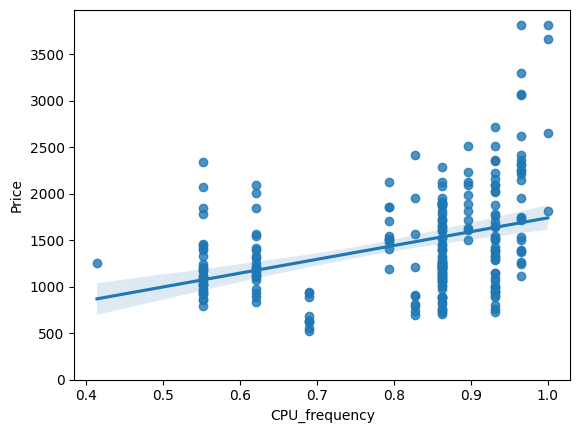

In [3]:
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

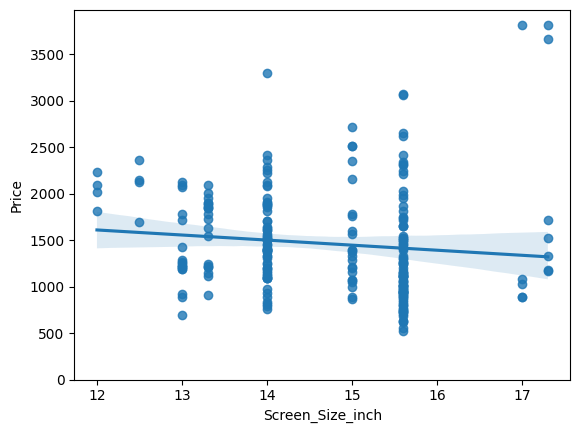

In [4]:
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

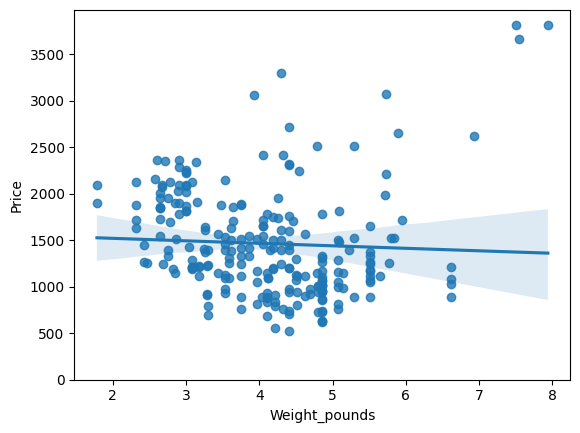

In [5]:
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)

The scatter-regression plot for CPU_frequency is:


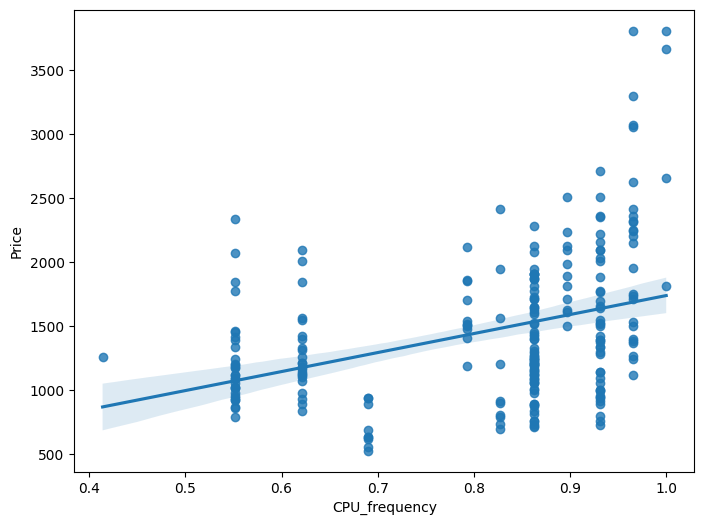

The scatter-regression plot for Screen_Size_inch is:


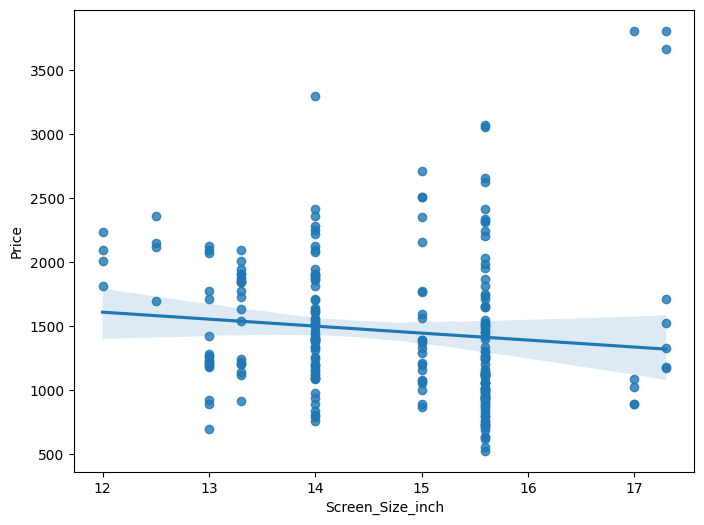

The scatter-regression plot for Weight_pounds is:


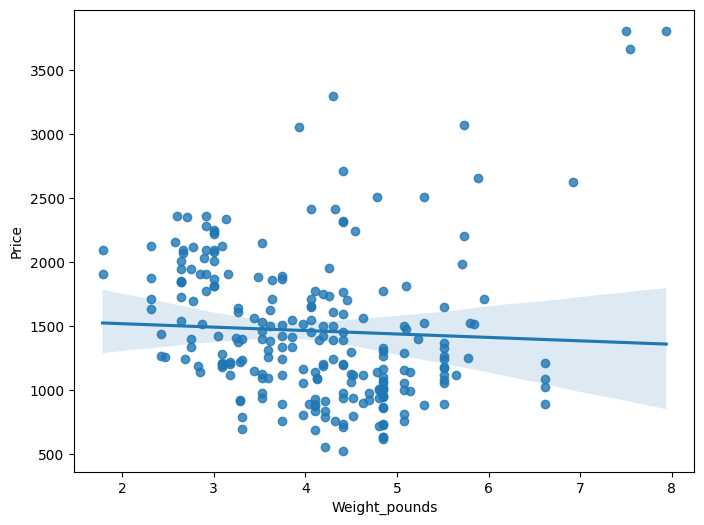

In [6]:
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
  print(f"The scatter-regression plot for {param} is:")
  #to make a separate figure for each loop
  plt.figure(figsize=(8,6))
  #to make a scatter-regression plot
  sns.regplot(x=param, y="Price", data=df)
  plt.show()

In [7]:
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
  print(f"Correlation of Price and {param} is:\n", df[[param, "Price"]].corr())

Correlation of Price and CPU_frequency is:
                CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is:
                   Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is:
                Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


In [8]:
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
  pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
  print(f"For {param} the Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

For CPU_frequency the Pearson Correlation Coefficient is 0.36666555892588604  with a P-value of P = 5.5024633507134225e-09
For Screen_Size_inch the Pearson Correlation Coefficient is -0.11064420817118266  with a P-value of P = 0.08853397846830766
For Weight_pounds the Pearson Correlation Coefficient is -0.05031225837751549  with a P-value of P = 0.43976938534338944


The boxplot for Category is:


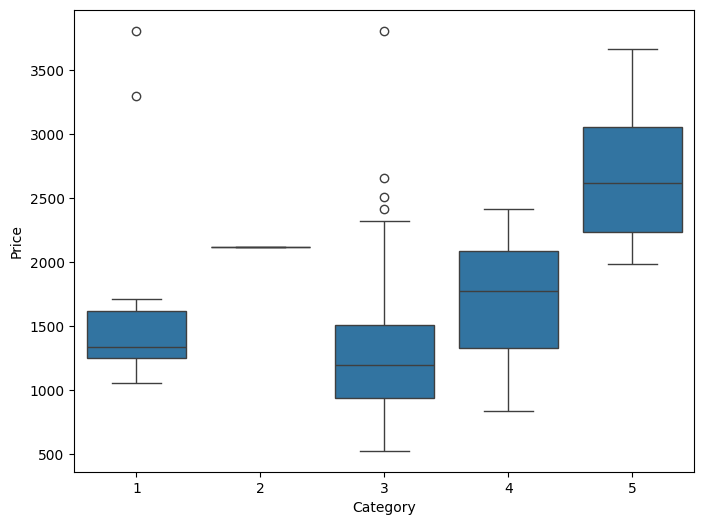

The boxplot for GPU is:


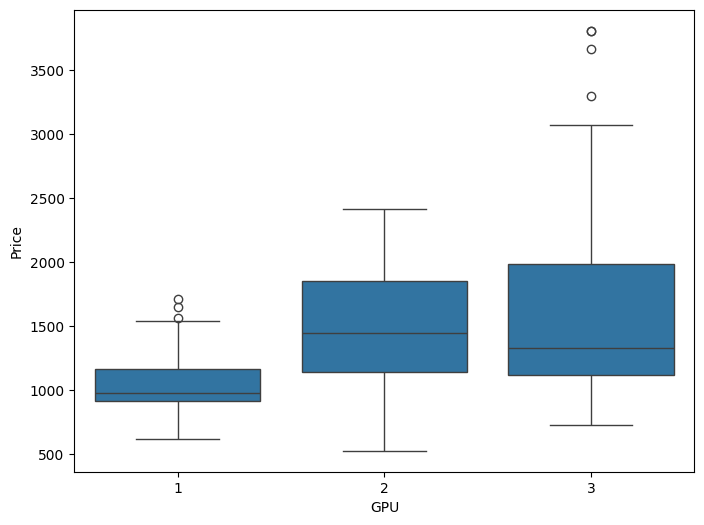

The boxplot for OS is:


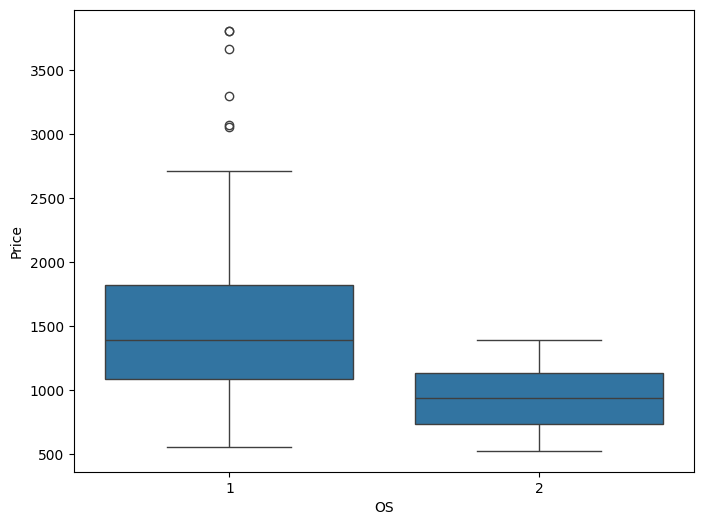

The boxplot for CPU_core is:


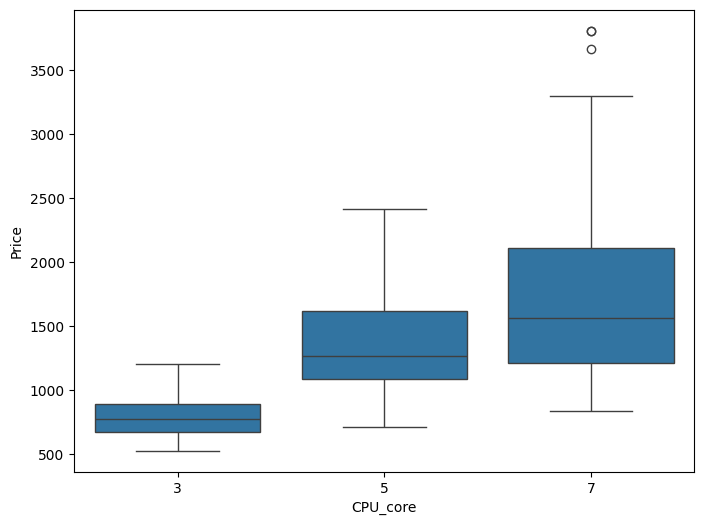

The boxplot for RAM_GB is:


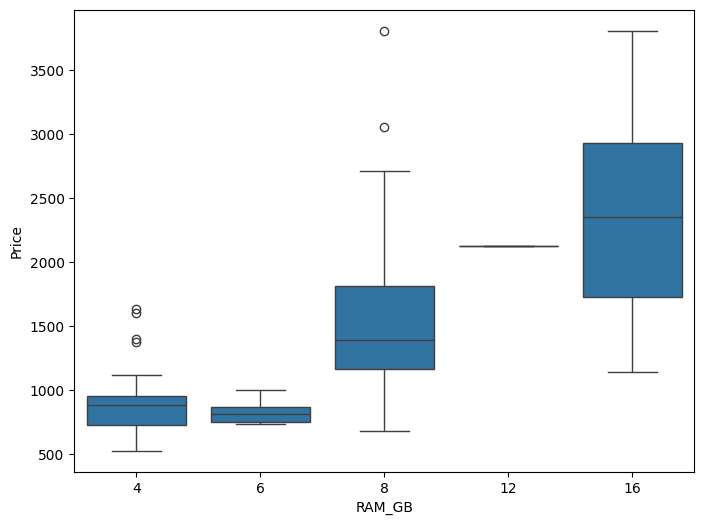

The boxplot for Storage_GB_SSD is:


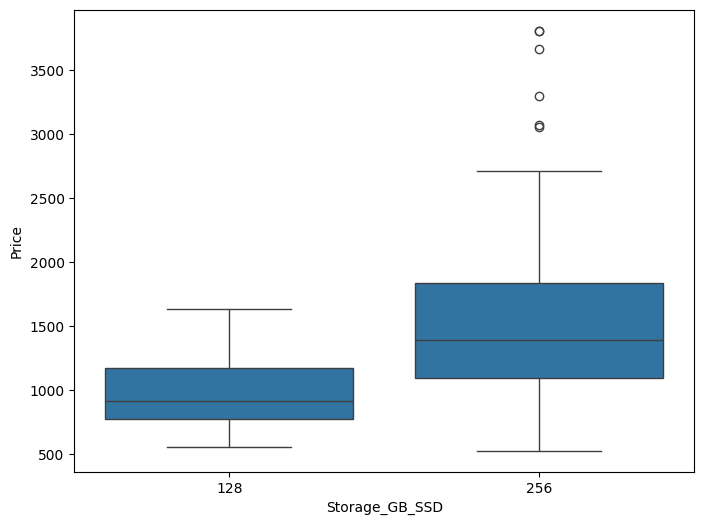

In [9]:
for param in ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]:
  print(f"The boxplot for {param} is:")
  plt.figure(figsize=(8,6))
  sns.boxplot(x=param, y="Price", data=df)
  plt.show()


In [10]:
print(df.describe())
print(df.describe(include=['object']))

       Unnamed: 0.1  Unnamed: 0    Category         GPU          OS  \
count    238.000000  238.000000  238.000000  238.000000  238.000000   
mean     118.500000  118.500000    3.205882    2.151261    1.058824   
std       68.848868   68.848868    0.776533    0.638282    0.235790   
min        0.000000    0.000000    1.000000    1.000000    1.000000   
25%       59.250000   59.250000    3.000000    2.000000    1.000000   
50%      118.500000  118.500000    3.000000    2.000000    1.000000   
75%      177.750000  177.750000    4.000000    3.000000    1.000000   
max      237.000000  237.000000    5.000000    3.000000    2.000000   

         CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count  238.000000        238.000000     238.000000  238.000000   
mean     5.630252         14.688655       0.813822    7.882353   
std      1.241787          1.166045       0.141860    2.482603   
min      3.000000         12.000000       0.413793    4.000000   
25%      5.000000         14.0

In [11]:
df_gptest = df[[ "GPU", "CPU_core", "Price"]]
grouped_test1 = df_gptest.groupby(["GPU", "CPU_core"], as_index=False).mean()
print(grouped_test1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [12]:
grouped_pivot = grouped_test1.pivot(index="GPU", columns="CPU_core")
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


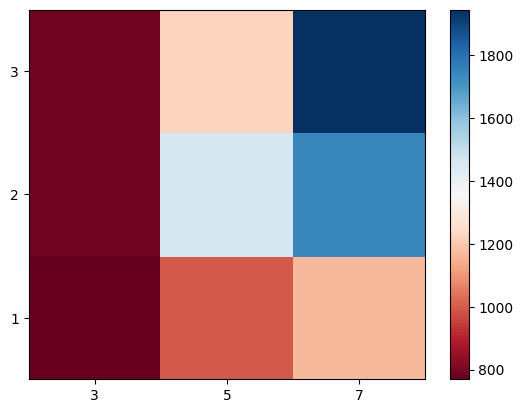

In [13]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#insert colorbar
fig.colorbar(im)

In [14]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
  pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
  print(f"For {param} the Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

For RAM_GB the Pearson Correlation Coefficient is 0.5492972971857844  with a P-value of P = 3.681560628842868e-20
For CPU_frequency the Pearson Correlation Coefficient is 0.36666555892588604  with a P-value of P = 5.5024633507134225e-09
For Storage_GB_SSD the Pearson Correlation Coefficient is 0.2434207552181029  with a P-value of P = 0.00014898923191724174
For Screen_Size_inch the Pearson Correlation Coefficient is -0.11064420817118266  with a P-value of P = 0.08853397846830766
For Weight_pounds the Pearson Correlation Coefficient is -0.05031225837751549  with a P-value of P = 0.43976938534338944
For CPU_core the Pearson Correlation Coefficient is 0.4593977773355115  with a P-value of P = 7.912950127009034e-14
For OS the Pearson Correlation Coefficient is -0.22172980114827384  with a P-value of P = 0.0005696642559246749
For GPU the Pearson Correlation Coefficient is 0.2882981988881428  with a P-value of P = 6.166949698364282e-06
For Category the Pearson Correlation Coefficient is 0.28